<h1>Import frameworks</h1>

In [6]:
from matplotlib import pyplot
import tarfile
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns


<h1>Read emails</h1>

In [13]:
def decode_bytes(bytes, encodings=('utf-8', 'ascii', 'ISO-8859-1')):
    for encoding in encodings:
        try:
            decoded_text = bytes.decode(encoding)
            return decoded_text
        except UnicodeDecodeError:
            continue
    return None

def parse_tar_bz2(file_path):
    emails = []
    try:
        with tarfile.open(file_path, 'r:bz2') as tar:
            for member in tar.getmembers():
                #print("File:", member.name)
                file = tar.extractfile(member)
                if file is not None:
                    content = file.read()
                    emails.append(decode_bytes(content))
    except tarfile.TarError as e:
        print("Error occurred while processing the tar.bz2 file:", e)
    return emails


<h1>Evaluate model</h1>

In [12]:
pyplot.rcParams['text.usetex'] = True

def evaluate_model(y_test, y_pred, title, classifier):

     # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(title + " and spam " + classifier + " accuracy:", accuracy)
    print(title + " and spam " + classifier + " precision:", precision)
    print(title + " and spam " + classifier + " recall:", recall)
    print(title + " and spam " + classifier + " F1 score:", 2 * (precision * recall) / (precision + recall))

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = pyplot.subplots(figsize=(8, 6), layout='constrained')
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Spam', title], 
                yticklabels=['Spam', title])
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix ' + title + ' and spam ' + classifier) 
    filename = title + '_and_spam_' + classifier + '_confusion_matrix.pdf'
    filename = filename.replace(' ', '_').lower()
    fig.savefig(filename, bbox_inches='tight')



<h1>Classify email</h1>

In [11]:
def classify_email(emails, labels, title):
   
    vectorizer = CountVectorizer()

    # Fit CountVectorizer object to email data and
    # transform email data into a matrix of token counts
    email_matrix = vectorizer.fit_transform(emails)
    # Split data into training and test sets, with 20% of data reserved for testing
    X_train, X_test, y_train, y_test = train_test_split(email_matrix, labels, test_size=0.2)
    print('Size of test set (' + title + '):', len(y_test))
    
    # Train classifier (Multinomial Naive Bayes and Bernoulli Naive Bayes)
    classifierMNB = MultinomialNB()
    classifierBNB = BernoulliNB()
    classifierMNB.fit(X_train, y_train)
    classifierBNB.fit(X_train, y_train)

    # Predict labels for test set
    y_predMNB = classifierMNB.predict(X_test)
    y_predBNB = classifierBNB.predict(X_test)
    
   
    # Evaluate the classifier
    evaluate_model(y_test, y_predMNB, title, "Multinomial Naive Bayes")
    evaluate_model(y_test, y_predBNB, title, "Bernoulli Naive Bayes")


<h1>Load emails and classify</h1>

Number of easy ham emails: 2551
Number of hard ham emails: 250
Number of spam emails: 501
Size of test set (Easy ham): 611
Easy ham and spam Multinomial Naive Bayes accuracy: 0.9852700490998363
Easy ham and spam Multinomial Naive Bayes precision: 0.9825918762088974
Easy ham and spam Multinomial Naive Bayes recall: 1.0
Easy ham and spam Multinomial Naive Bayes F1 score: 0.9912195121951219
Easy ham and spam Bernoulli Naive Bayes accuracy: 0.9165302782324058
Easy ham and spam Bernoulli Naive Bayes precision: 0.9147005444646098
Easy ham and spam Bernoulli Naive Bayes recall: 0.9921259842519685
Easy ham and spam Bernoulli Naive Bayes F1 score: 0.9518413597733711
Size of test set (Hard ham): 151
Hard ham and spam Multinomial Naive Bayes accuracy: 0.9337748344370861
Hard ham and spam Multinomial Naive Bayes precision: 1.0
Hard ham and spam Multinomial Naive Bayes recall: 0.8275862068965517
Hard ham and spam Multinomial Naive Bayes F1 score: 0.9056603773584906
Hard ham and spam Bernoulli Naive

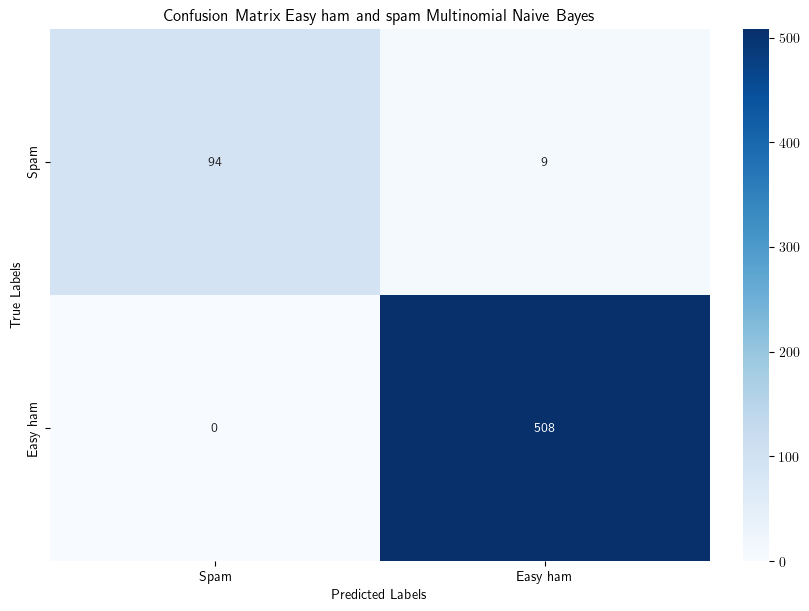

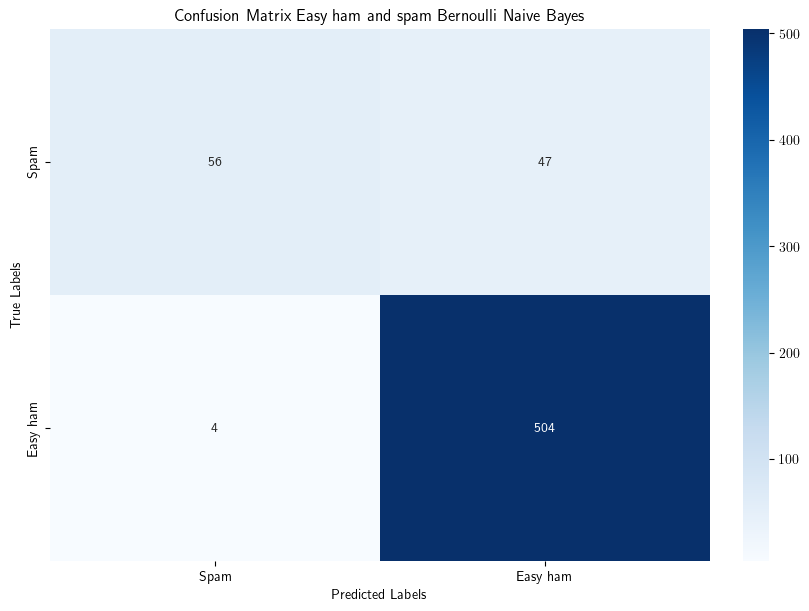

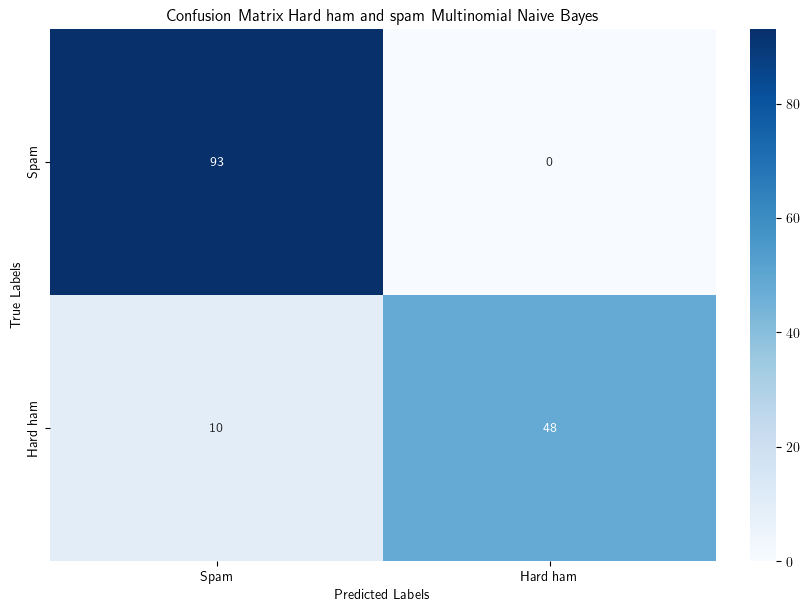

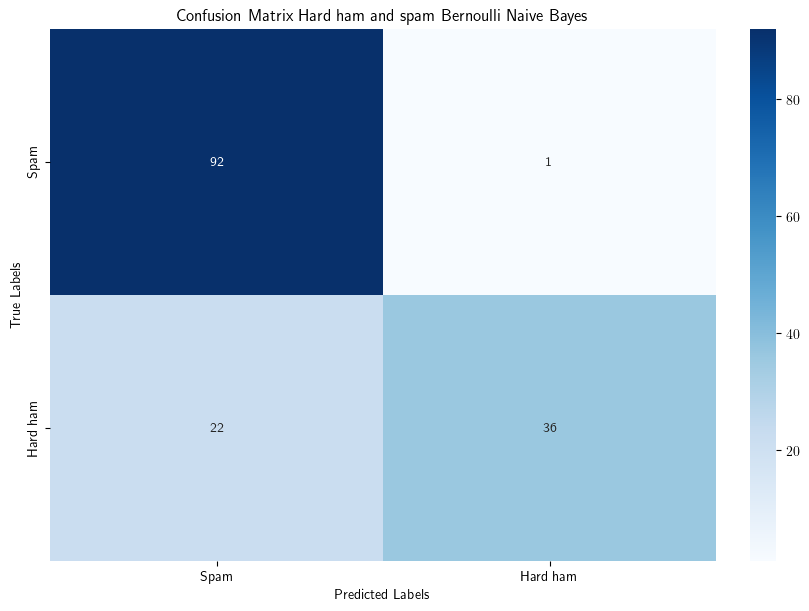

In [14]:
file_path_easy_ham = "../20021010_easy_ham.tar.bz2"  
emails_easy_ham = parse_tar_bz2(file_path_easy_ham)
file_path_hard_ham = "../20021010_hard_ham.tar.bz2"  
emails_hard_ham = parse_tar_bz2(file_path_hard_ham)
file_path_spam = "../20021010_spam.tar.bz2"  
emails_spam = parse_tar_bz2(file_path_spam)

labels_easy_and_spam = [1] * len(emails_easy_ham) + [0] * len(emails_spam)
emails_easy_and_spam = emails_easy_ham + emails_spam

labels_hard_and_spam = [1] * len(emails_hard_ham) + [0] * len(emails_spam)
emails_hard_and_spam = emails_hard_ham + emails_spam

print("Number of easy ham emails:", len(emails_easy_ham))
print("Number of hard ham emails:", len(emails_hard_ham))
print("Number of spam emails:", len(emails_spam))

classify_email(emails_easy_and_spam, labels_easy_and_spam, "Easy ham")
classify_email(emails_hard_and_spam, labels_hard_and_spam, "Hard ham")